In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [196]:
c = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_risk.csv')

In [197]:
c.head(5)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [198]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

<Axes: xlabel='class', ylabel='count'>

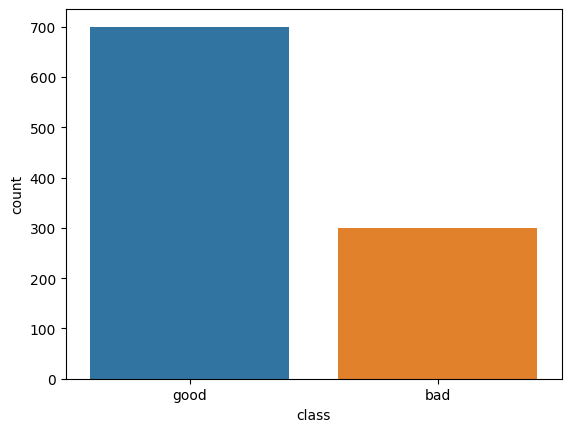

In [199]:
sns.countplot(x = 'class', data = c)

In [200]:
c.replace({'good':1,'bad':0}, inplace = True)

In [201]:
c.head(5)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0


In [202]:
X = c.drop(labels = {'class'}, axis = 1)
y = c['class']

In [203]:
X = pd.get_dummies(X)

In [204]:
X

,credit_usage,current_balance,location,residence_since,cc_age,existing_credits,num_dependents,over_draft_0<=X<200,over_draft_<0,over_draft_>=200,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
996,30,3857,4,4,40,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,1
997,12,804,4,4,38,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
998,45,1845,4,4,23,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [205]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [206]:
X_scaled

array([[0.02941176, 0.05056674, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.64705882, 0.31368989, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.11764706, 0.10157368, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.11764706, 0.03048311, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.60294118, 0.08776274, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.60294118, 0.23803235, 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [208]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 61)
(200, 61)
(800,)
(200,)


In [209]:
classifier_model = tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units = 32, activation = 'relu', input_shape = (61,)))
classifier_model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [210]:
classifier_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [211]:
epochs_hist = classifier_model.fit(X_train,y_train,epochs = 100, validation_split = 0.2)

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 5.9673 - accuracy: 0.5422 - val_loss: 1.0128 - val_accuracy: 0.7375
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 1.2320 - accuracy: 0.6094 - val_loss: 3.2138 - val_accuracy: 0.3313
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.2305 - accuracy: 0.5719 - val_loss: 1.2133 - val_accuracy: 0.7375
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 1.2065 - accuracy: 0.5828 - val_loss: 0.9606 - val_accuracy: 0.7375
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.1553 - accuracy: 0.5562 - val_loss: 0.9851 - val_accuracy: 0.5437
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 1.9657 - accuracy: 0.5047 - val_loss: 1.7249 - val_accuracy: 0.7375
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 2.6387 - accuracy: 0.6156 - val_loss: 1.7108 - val_accuracy: 0.7375
Epoch 8/100


In [212]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

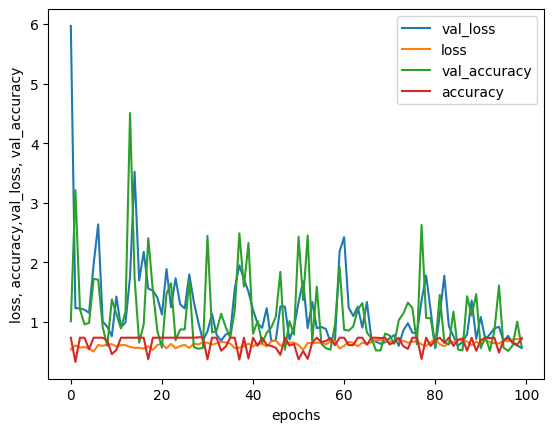

In [213]:
eh =epochs_hist.history['loss']
eh2 = epochs_hist.history['accuracy']
eh3 = epochs_hist.history['val_loss']
eh4 = epochs_hist.history['val_accuracy']
plt.plot(eh)
plt.plot(eh2)
plt.plot(eh3)
plt.plot(eh4)
plt.xlabel('epochs')
plt.ylabel('loss, accuracy,val_loss, val_accuracy')
plt.legend({'loss', 'accuracy', 'val_loss', 'val_accuracy'})

In [214]:
y_predict = classifier_model.predict(X_test)

7/7 [==============================] - 1s 2ms/step


In [215]:
y_predict

array([[0.930006  ],
       [0.89358044],
       [0.48919404],
       [0.79898274],
       [0.7581235 ],
       [0.9183596 ],
       [0.4956054 ],
       [0.94334906],
       [0.5914645 ],
       [0.89537084],
       [0.9003675 ],
       [0.9461474 ],
       [0.77215195],
       [0.87490845],
       [0.945779  ],
       [0.6091376 ],
       [0.7018068 ],
       [0.8119734 ],
       [0.83704   ],
       [0.98665535],
       [0.62850475],
       [0.93564653],
       [0.75201213],
       [0.64680743],
       [0.5859523 ],
       [0.91152775],
       [0.987481  ],
       [0.964626  ],
       [0.88062567],
       [0.8766819 ],
       [0.83696896],
       [0.9036413 ],
       [0.92016655],
       [0.96913874],
       [0.3620897 ],
       [0.92875546],
       [0.87109596],
       [0.9034072 ],
       [0.85186297],
       [0.9697728 ],
       [0.9810425 ],
       [0.3855873 ],
       [0.86724687],
       [0.59422237],
       [0.9325079 ],
       [0.9041285 ],
       [0.9462437 ],
       [0.985

In [216]:
y_predict = (y_predict > 0.5)

In [217]:
y_predict

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [218]:
y_train_predict = classifier_model.predict(X_train)

25/25 [==============================] - 0s 1ms/step


In [219]:
y_train_predict = (y_train_predict>0.5)

In [220]:
y_train_predict

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

<Axes: >

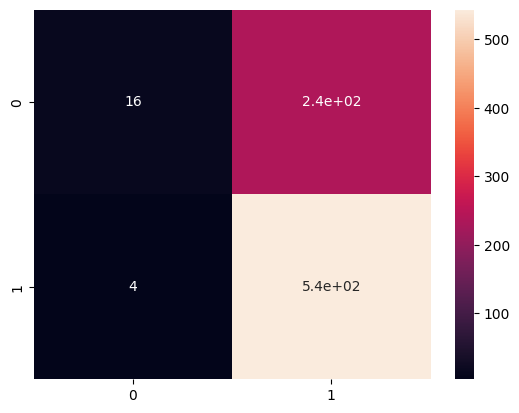

In [221]:
cm = confusion_matrix(y_train,y_train_predict)
sns.heatmap(cm,annot = True)

<Axes: >

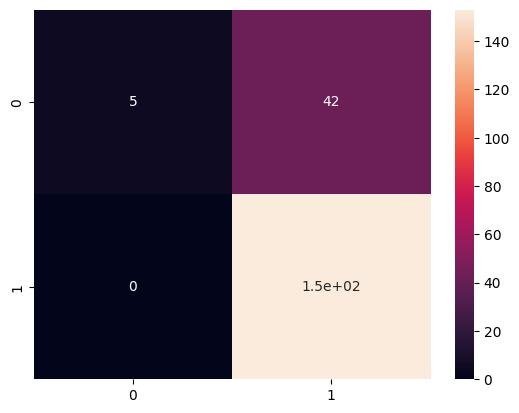

In [222]:
cm2 = confusion_matrix(y_test,y_predict)
sns.heatmap(cm2,annot = True)

In [223]:
evaluation = classifier_model.evaluate(X_test,y_test)
print('test_accuracy:{}'.format(evaluation[1]))

7/7 [==============================] - 0s 3ms/step - loss: 0.4537 - accuracy: 0.7900
test_accuracy:0.7900000214576721
